In [107]:
import os
import pandas as pd
import matplotlib.pyplot as plt

date = "0524"
folder = os.path.join("result", date)
print(folder)

result\0524


In [108]:

def ploting(df, folder, filename):
    chart_path = os.path.join(folder, f'{filename}_Loss.png')
    plt.plot(df['loss'])
    plt.title(filename)
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.savefig(chart_path)
    plt.close()
    
    chart_path = os.path.join(folder, f'{filename}_Gen_Loss.png')
    plt.plot(df['gen_loss'])
    plt.title(filename)
    plt.xlabel('Index')
    plt.ylabel('Gen_Loss')
    plt.savefig(chart_path)
    plt.close()
    
    chart_path = os.path.join(folder, f'{filename}_BD_Loss.png')
    plt.plot(df['bd_loss'])
    plt.title(filename)
    plt.xlabel('Index')
    plt.ylabel('BD_Loss')
    plt.savefig(chart_path)
    plt.close()

In [109]:
def filtering(df):
    # max iat > min iat
    df_filtered = df[df['max iat'] >= df['min iat']]
    # min iat 全為0
    df_filtered = df_filtered[df_filtered['min iat'] == 0]
    # max pkt len > min pkt len
    df_filtered = df_filtered[df_filtered['max pkt_length'] >=  df_filtered['min pkt_length']]
    # pkt count > 0
    df_filtered = df_filtered[df_filtered['packet count'] > 0]
    
    # [FIN, ACK]
    df_filtered = df_filtered[df_filtered['fin count'] <= df_filtered['ack count']]
    # [PSH, ACK]
    df_filtered = df_filtered[df_filtered['psh count'] <= df_filtered['ack count']]
    
    
    return df_filtered

In [110]:
features=[
                'flow duration', 'packet count', 'max pkt_length', 'min pkt_length',
                'max iat', 'min iat', 'fin count', 'syn count', 'psh count', 
                'ack count', "predict", "loss", "gen_loss", "bd_loss"
                ]

In [34]:
for file in os.listdir(folder):
    if file.endswith("label_0.csv"):
        file_path = os.path.join(folder, file)
        df = pd.read_csv(file_path, header=None, names=features)
        print(f'Filtering {file} ---------------------------------')
        print(f'origin number of data: {len(df)}')
#         print(df)
        df_filtered = filtering(df)
        print(f'filered number of data: {len(df_filtered)}')
        output_dir = os.path.join(folder, 'filtered_data')
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f'filtered_{file}')
        df_filtered.to_csv(output_path, mode='w', header=features, index=False, encoding="utf-8")

Filtering data_11_label_0.csv ---------------------------------
origin number of data: 490
filered number of data: 490
Filtering data_12_label_0.csv ---------------------------------
origin number of data: 272
filered number of data: 272
Filtering data_13_label_0.csv ---------------------------------
origin number of data: 419
filered number of data: 419
Filtering data_14_label_0.csv ---------------------------------
origin number of data: 382
filered number of data: 0
Filtering data_15_label_0.csv ---------------------------------
origin number of data: 1703
filered number of data: 1703
Filtering data_16_label_0.csv ---------------------------------
origin number of data: 645
filered number of data: 0
Filtering data_1_label_0.csv ---------------------------------
origin number of data: 1923
filered number of data: 0
Filtering data_2_label_0.csv ---------------------------------
origin number of data: 1489
filered number of data: 1489
Filtering data_3_label_0.csv ----------------------

In [111]:
for file in os.listdir(folder):
    if file.startswith("generated_data"):
        file_path = os.path.join(folder, file)
        df = pd.read_csv(file_path, header=None, names=features, skiprows=1)
        print("-" * 10)
        print(f'Filtering {file} ...')
        print(f'number of origin data: {len(df)}')
        df_0 = df[df['predict'] == 0]
        print(f'number of label-0 data: {len(df_0)}')
        
#         print(df)
        df_filtered = filtering(df_0)
        print(f'number of filered data: {len(df_filtered)}')
        # append origin data
        origin = df.iloc[[0]]
        df_filtered = pd.concat([origin, df_filtered], ignore_index=True)
        output_dir = os.path.join(folder, 'filtered_data')
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f'filtered_{file}')
        df_filtered.to_csv(output_path, mode='w', header=features, index=False, encoding="utf-8")

----------
Filtering generated_data_13_lr_1e-06_a_1.0_b_5.0_thsh_1.0.csv ...
number of origin data: 50001
number of label-0 data: 0
number of filered data: 0
----------
Filtering generated_data_13_lr_1e-06_a_1.0_b_5.0_thsh_10.0.csv ...
number of origin data: 50001
number of label-0 data: 0
number of filered data: 0
----------
Filtering generated_data_13_lr_1e-06_a_1.0_b_5.0_thsh_2.0.csv ...
number of origin data: 50001
number of label-0 data: 0
number of filered data: 0
----------
Filtering generated_data_13_lr_1e-06_a_1.0_b_5.0_thsh_3.0.csv ...
number of origin data: 50001
number of label-0 data: 0
number of filered data: 0
----------
Filtering generated_data_13_lr_1e-06_a_1.0_b_5.0_thsh_4.0.csv ...
number of origin data: 50001
number of label-0 data: 0
number of filered data: 0
----------
Filtering generated_data_13_lr_1e-06_a_1.0_b_5.0_thsh_5.0.csv ...
number of origin data: 50001
number of label-0 data: 0
number of filered data: 0
----------
Filtering generated_data_13_lr_1e-06_a_1

Drawing charts generated_data_11_lr_1e-06_a_0.1_b_1.0_thsh_1.0.csv-----------------------------
Drawing charts generated_data_12_lr_1e-06_a_1.0_b_1.0_thsh_1.0.csv-----------------------------
Drawing charts generated_data_13_lr_1e-06_a_1.0_b_0.1_thsh_1.0.csv-----------------------------
Drawing charts generated_data_14_lr_1e-06_a_2.0_b_1.0_thsh_1.0.csv-----------------------------


KeyboardInterrupt: 

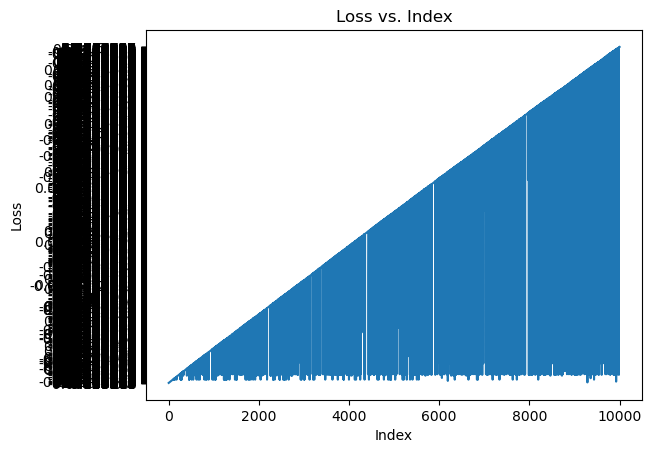

In [13]:
for file in os.listdir(folder):
    if file.startswith("generated_data"):
        file_path = os.path.join(folder, file)
#         print(file_path)
        df = pd.read_csv(file_path, header=None, names=features)
        print(f'Drawing charts {file}-----------------------------')
        output_dir = os.path.join(folder, 'chart')
        os.makedirs(output_dir, exist_ok=True)
        prefix = file.split('_lr')[0]
#         print(prefix)
        ploting(df, output_dir, prefix)